In [1]:
# Librerías principales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Verificar versión
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/clima.csv')

print(df.head())

     humedad  temperatura     viento  llueve
0  56.217808    10.553988  10.468227       0
1  96.550001    21.257028   9.879152       1
2  81.239576    31.188375  36.250183       1
3  71.906094    26.966747   9.981848       1
4  40.921305    29.196834  10.877989       0


In [4]:
X = df.drop('llueve', axis=1).values
y = df['llueve'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

In [5]:
X[:5]

array([[56.21780832, 10.55398787, 10.46822735],
       [96.55000145, 21.25702842,  9.87915196],
       [81.23957593, 31.18837508, 36.25018322],
       [71.90609389, 26.96674659,  9.98184799],
       [40.92130483, 29.19683444, 10.87798905]])

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    #Dropout(0.2),
    Dense(16, activation='relu'),
    #Dense(1, activation='sigmoid')  # salida binaria
    Dense(2, activation='softmax') #salida multiclase
])

# Creamos el optimizador con learning rate constante
optimizer = Adam(learning_rate=0.001)  # valor fijo

# Compilamos el modelo
model.compile(
    optimizer= optimizer,
    #loss='binary_crossentropy',
loss='sparse_categorical_crossentropy', #se usa con la activacion softmax
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 690 (2.70 KB)

 Trainable params: 690 (2.70 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    X_train, y_train,
    validation_split=0.3,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4830 - loss: 0.7435 - val_accuracy: 0.6178 - val_loss: 0.6423
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6526 - loss: 0.6103 - val_accuracy: 0.7556 - val_loss: 0.5419
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7709 - loss: 0.5224 - val_accuracy: 0.8578 - val_loss: 0.4618
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8228 - loss: 0.4588 - val_accuracy: 0.8800 - val_loss: 0.4001
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8369 - loss: 0.4174 - val_accuracy: 0.8711 - val_loss: 0.3574
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8676 - loss: 0.3538 - val_accuracy: 0.8711 - val_loss: 0.3267
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8683 - loss: 0.3293 - val_accuracy: 0.8578 - val_loss: 0.3089
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8668 - loss: 0.3144 - val_accuracy: 0.8489 - val_l

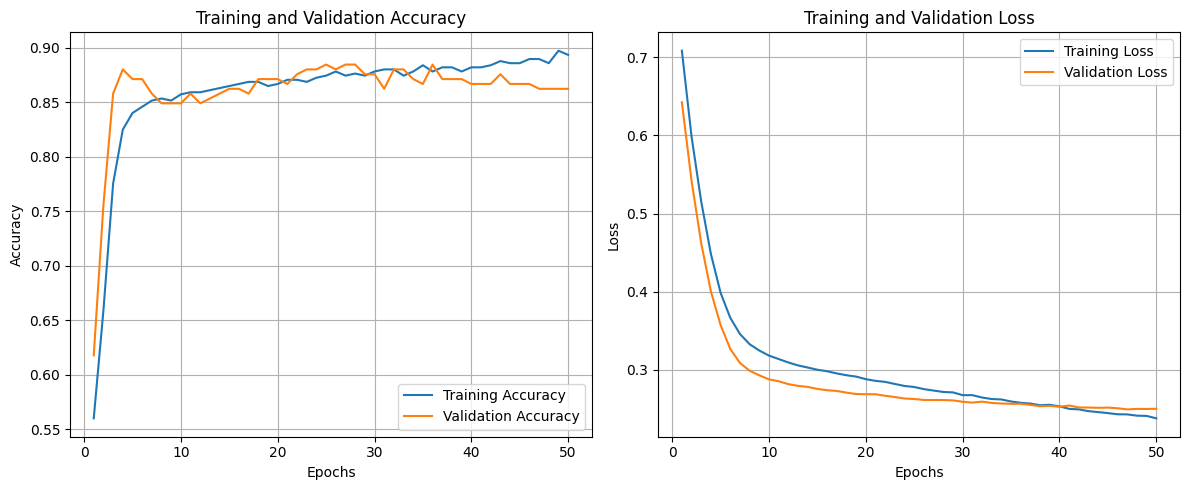

In [9]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en datos de prueba: {test_acc:.4f}")

Accuracy en datos de prueba: 0.8600


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


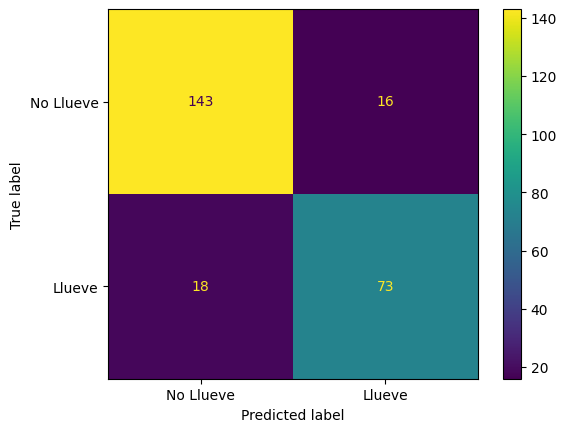

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 🔹 Paso 1: Obtener las predicciones del modelo
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, pred_labels)

# Para visualizarla
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Llueve', 'Llueve'])
disp.plot()

In [11]:
model.save('ModeloDiabetes.keras')

In [12]:
modelo_cargado_tf = tf.keras.models.load_model('ModeloDiabetes.keras')

In [16]:
h=float(input("Humedad: "))
t=float(input("\nTemperatura: "))
v=float(input("\nViento: "))

p=np.array([h, t, v])
p=p.reshape(1,-1)    #o p[np.newaxis, :]
p=scaler.transform(p)
prediccion = round(modelo_cargado_tf.predict(p)[0][0])

if (prediccion==1):
  print("No Lueve")
else:
  print("Llueve")

Humedad: 75

Temperatura: 20

Viento: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Llueve
